Series de Fourier

Se importan las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import signal as sp
# Importamos todo el modulo sympy
from sympy import *
# Importamos las variables simbolicas 'n' y 't'
from sympy.abc import n, t

Definición de variables

In [3]:
# Definición del periodo
T = 2*pi
# Definición de la frecuencia angular
w = (2*pi)/T
#Definición de la amplitud
A = 1
time = np.arange(-3, 3, 0.001)
#Definición del desfase
Df= np.pi/2
#Funcion por partes
squareWaveFunction = (sp.square(time + Df) ) + 0.01

Graficación de la onda cuadrada

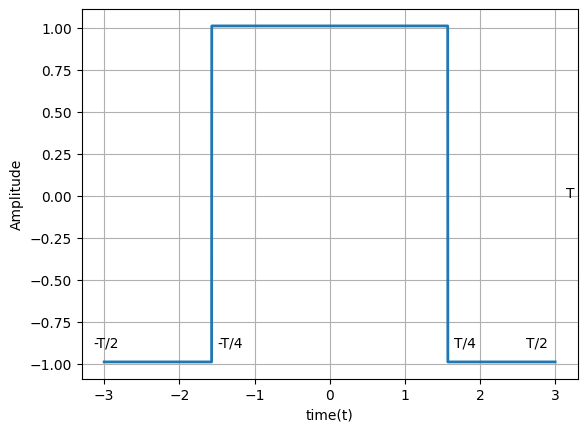

In [5]:
plt.plot(time, squareWaveFunction, lw=2)
plt.grid()
plt.annotate('T', xy = (np.pi, 0), xytext = (np.pi, -0.01))
plt.annotate('T/2', xy = (np.pi / 2.0, 0), xytext = (np.pi / 1.2, -0.9))
plt.annotate('T/4', xy = (np.pi / 2.0, 0), xytext = (np.pi / 1.9, -0.9))
plt.annotate('-T/2', xy = (np.pi / -2, 0), xytext = (np.pi / -1.0, -0.9))
plt.annotate('-T/4', xy = (np.pi / -2, 0), xytext = (np.pi / -2.1, -0.9))
plt.ylabel('Amplitude')
plt.xlabel('time(t)')
plt.show()

Se integran las funciones (2/T), (2/pi)sin(2nt) y (2/pi)cos(2nt)

In [6]:

# Funcion (2/T) 
ao = (2/T)*(integrate(-1, (t, -T/2, -T/4)) + integrate(1, (t, -T/4, T/4)) + integrate(-1, (t, T/4, T/2)))

# Funcion (2/pi)*sin(2nt)
an = (2/T)*(integrate(-cos(n*w*t), (t, -T/2, -T/4)) + integrate(cos(n*w*t), (t, -T/4, T/4)) + integrate(-cos(n*w*t), (t, T/4, T/2)))

# Funcion (2/pi)*cos(2nt) 
bn = (2/T)*(integrate(-sin(n*w*t), (t, -T/2, -T/4)) + integrate(sin(n*w*t), (t, -T/4, T/4)) + integrate(-sin(n*w*t), (t, T/4, T/2)))



Calculo de la de la serie basada en los coeficientes

In [7]:
print( "f(x) = ")

#Se varia el numero de coeficientes hasta que se obtengan ocho 
nCoeficientes = 16
serie = (ao/2)
for i in range(1, nCoeficientes + 1):
    serie = serie + (an*cos(n*w*t)).subs(n, i)
for j in range(1, nCoeficientes + 1):
    serie = serie + (bn*sin(n*w*t)).subs(n, j)

pprint(serie)

f(x) = 
4⋅cos(t)   4⋅cos(3⋅t)   4⋅cos(5⋅t)   4⋅cos(7⋅t)   4⋅cos(9⋅t)   4⋅cos(11⋅t)   4
──────── - ────────── + ────────── - ────────── + ────────── - ─────────── + ─
   π          3⋅π          5⋅π          7⋅π          9⋅π           11⋅π       

⋅cos(13⋅t)   4⋅cos(15⋅t)
────────── - ───────────
   13⋅π          15⋅π   


Se grafica individualmente cada serie y se sobreponen

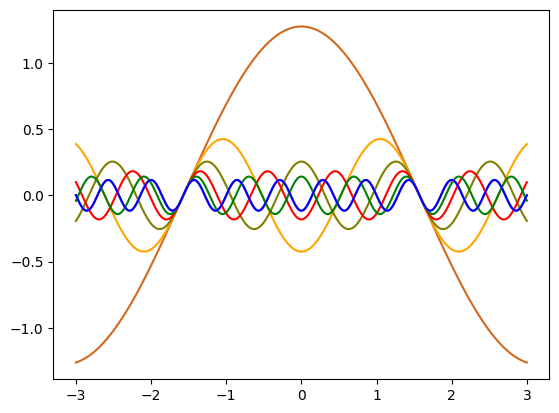

In [8]:


#Calculo de la serie 1
serie1 = (4 * np.cos(time)) / np.pi
plt.plot(time, serie1, 'chocolate')

#Calculo de la serie 2
serie2 = (-4 * np.cos(3*time)) / (3*np.pi)
plt.plot(time, serie2, 'orange')

#Calculo de la serie 3
serie3 = (4 * np.cos(5*time)) / (5*np.pi)
plt.plot(time, serie3, 'olive')

#Calculo de la serie 4
serie4 = (-4 * np.cos(7*time)) / (7*np.pi)
plt.plot(time, serie4, 'red')

#Calculo de la serie 5
serie5= (4 * np.cos(9*time)) / (9*np.pi)
plt.plot(time, serie5, 'green')

#Calculo de la serie 6
serie6 = (-4 * np.cos(11*time)) / (11*np.pi)
plt.plot(time, serie6, 'violet')

serie7 = (4 * np.cos(13*time)) / (13*np.pi)
plt.plot(time, serie6, 'gray')

serie8 = (-4 * np.cos(15*time)) / (15*np.pi)
plt.plot(time, serie6, 'blue')
plt.show()

Combinación de las series calculadas

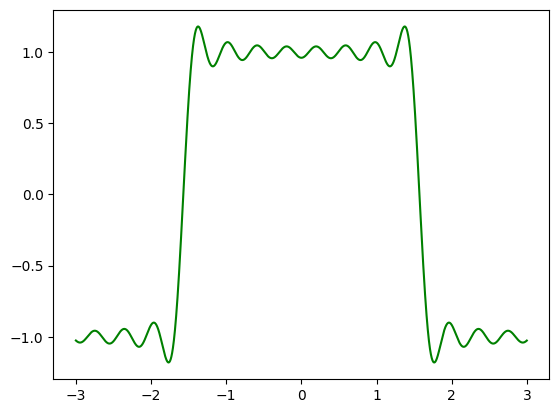

In [9]:
Sumseries = serie1 + serie2 + serie3 + serie4 + serie5 + serie6 + serie7 + serie8

plt.plot(time, Sumseries, 'green')

Superposición de la señal resultante con respecto a la onda cuadrada

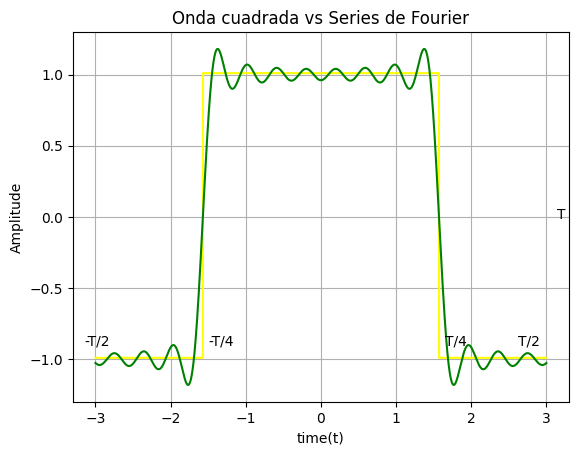

In [10]:
plt.plot(time, squareWaveFunction, 'yellow', label = 'onda cuadrada' )
plt.plot(time, Sumseries, 'green', label = 'Series de fourier')
plt.grid()
plt.annotate('T', xy = (np.pi, 0), xytext = (np.pi, -0.01))
plt.annotate('T/2', xy = (np.pi / 2.0, 0), xytext = (np.pi / 1.2, -0.9))
plt.annotate('T/4', xy = (np.pi / 2.0, 0), xytext = (np.pi / 1.9, -0.9))
plt.annotate('-T/2', xy = (np.pi / -2, 0), xytext = (np.pi / -1.0, -0.9))
plt.annotate('-T/4', xy = (np.pi / -2, 0), xytext = (np.pi / -2.1, -0.9))
plt.ylabel('Amplitude')
plt.xlabel('time(t)')
plt.title('Onda cuadrada vs Series de Fourier')
plt.show()